# Convolutional Neural Networks

## Machine learning on images

In [1]:
# Import necessary imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### MNIST

In [2]:
from keras.datasets import mnist

In [3]:
# Load the downloaded mnist dataset from data
(X_train, y_train), (X_test, y_test) = mnist.load_data('../mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Print the shape of the training dataset
# Expected: 60000, 28, 28
X_train.shape

(60000, 28, 28)

In [5]:
# Print the shape of the test dataset
# Expected: 10000, 28, 28
X_test.shape

(10000, 28, 28)

In [6]:
# Show the data of the first trainings image (28 X 28 array).
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

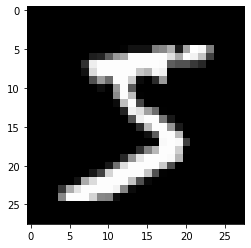

In [7]:
# Show the first image of the trainingsset in grayscale.
plt.imshow(X_train[0], cmap='gray')

In [8]:
# reshape the two-dimensional (28 X 28) array's to a one-dimensional (784) array.
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [9]:
# Print the shape of the training dataset
# Expected: 60000, 784, because it is reshaped
X_train.shape

(60000, 784)

In [10]:
# Print the shape of the test dataset
# Expected: 10000, 784, because it is reshaped
X_test.shape

(10000, 784)

In [11]:
# Change the value type of the dataset from int to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Divide all values by 255.0, so they will be between 0.0 and 1.0
X_train /= 255.0
X_test /= 255.0

In [12]:
# Show the data of the first trainings image.
# Expected: 784 values between 0.0 and 1.0
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
# Convert y_train and y_test to binary class matrices.
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [15]:
# Print the first value of y_train
y_train[0]

5

In [16]:
# Print the first matrix of y_train
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
# Print the shape of y_train_cat
# Expected 60000, 10, because of categorisation
y_train_cat.shape

(60000, 10)

In [18]:
# Print the shape of y_test_cat
# Expected 10000, 10, because of categorisation
y_test_cat.shape

(10000, 10)

### Fully connected on images

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

# Create a sequential model
model = Sequential()

# Add dense layer 1 with 512 neurons and a 28 X 28 input.
# ReLU activation function is used. Formula: f(x) = max(0, x); 
# According to the formula: The function returns 0 if it receives any negative input, but for any positive input, it returns that value back.
# In other words: It gives an output that has a range from 0 to infinity.
model.add(Dense(512, input_dim=28*28, activation='relu'))

# Add dense layer 2 with 256 neurons. ReLU activation function is used.
model.add(Dense(256, activation='relu'))

# Add dense layer 3 with 128 neurons. ReLU activation function is used.
model.add(Dense(128, activation='relu'))

# Add dense layer 4 with 32 neurons. ReLu activation function is used.
model.add(Dense(32, activation='relu'))

# Add dense layer 5 with 10 neurons. Softmax activation function is used in de output layer.
#  The softmax activation function calculates the relative probabilities. Softmax is popularly used for multiclass classification problems.
model.add(Dense(10, activation='softmax'))

# Config the model with losses and matrics with model.compile.
# loss = 'categorical_crossentropy': Computes the crossentropy loss between the labels and predictions.
# optimizer = 'rmsprop':  Maintains a moving average of the gradients and uses that average to extimate the variance.
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [20]:
# Train the model with model.fit().
    # batch_size = number of samples per gradient update.
    # epochs = number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
    # verbose = Verbosity mode 0 = silent, 1 = progress bar, 2 - one line per epoch.
    # validation_split = Data on which to evaluate the loss and any model metrics at the end of each epoch.
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 19s 8ms/step - loss: 0.6288 - accuracy: 0.8001 - val_loss: 0.1483 - val_accuracy: 0.9546
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.1190 - accuracy: 0.9633 - val_loss: 0.1220 - val_accuracy: 0.9627
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0717 - accuracy: 0.9787 - val_loss: 0.1121 - val_accuracy: 0.9675
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0499 - accuracy: 0.9842 - val_loss: 0.1101 - val_accuracy: 0.9711
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.1639 - val_accuracy: 0.9632
Epoch 6/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.1268 - val_accuracy: 0.9718
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.1180 - val_accuracy: 0.9751
Epoch

Text(0.5, 0, 'Epochs')

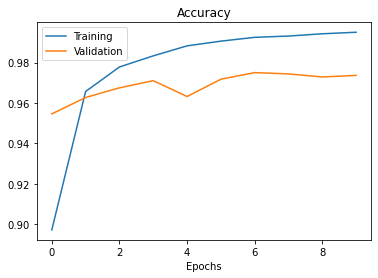

In [21]:
# Plot the accuracy of every epoch.
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [22]:
# Return the loss value & metrics values for the model in test mode.
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.9771


0.9771000146865845

## Final architecture

In [23]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D

In [24]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [25]:
X_train.shape

(60000, 28, 28, 1)

In [26]:
from keras.layers import Flatten, Activation

In [27]:
K.clear_session()

# Create a sequential model
model = Sequential()

# This layer creates a concolutional kernel that is convolved with the layer input to produce a tensor of outputs.
# Parameters: Conv2D(filters, kernel_size, input_shape):
    # filters: the number of output filters in the convolution
    # kernel_size: A tuple of 2 integers, specifying the height and width of the convolution window. --> 3 X 3 kernel
    # input_shape = (channels, rows, cols) --> 28 X 28 image
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))

# This layer downsamples the input along its spatial dimensions (heigt and width) by taking the maximum value over and input
# window for each channel of the input.
model.add(MaxPool2D(pool_size=(2, 2)))

# This applies an activation function to an output.
# ReLU activation function is used. See explenation of ReLU above.
model.add(Activation('relu'))

# This layer flattens the input. It does not affect the batch size
# Example: input = (10, 64) --> output = 640
model.add(Flatten())

# Add a dense layer with 128 neutrons and the activation function ReLU.
model.add(Dense(128, activation='relu'))

# Add a dense layer with 10 neutrons and the activation function softmax is used in the output layer
model.add(Dense(10, activation='softmax'))

# Config the model with losses and matrics with model.compile.
# loss = 'categorical_crossentropy': Computes the crossentropy loss between the labels and predictions.
# optimizer = 'rmsprop':  Maintains a moving average of the gradients and uses that average to extimate the variance.
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
# Print a string summary of the model: layers (type), output shapes and params
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [29]:
# Train the model with model.fit().
    # batch_size = number of samples per gradient update --> 128.
    # epochs = number of epochs to train the model. An epoch is an iteration over the entire x and y data provided --> 2.
    # verbose = Verbosity mode 0 = silent, 1 = progress bar, 2 - one line per epoch --> 1.
    # validation_split = Data on which to evaluate the loss and any model metrics at the end of each epoch --> 0.3.
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Epoch 1/2
329/329 [==============================] - 10s 24ms/step - loss: 0.5118 - accuracy: 0.8378 - val_loss: 0.1125 - val_accuracy: 0.9675
Epoch 2/2
329/329 [==============================] - 8s 24ms/step - loss: 0.0851 - accuracy: 0.9757 - val_loss: 0.0758 - val_accuracy: 0.9772


In [30]:
# Return the loss value & metrics values for the model in test mode.
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9786


[0.0639830231666565, 0.978600025177002]